In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

In [2]:
from nmt_run import *

translating es to en
callhome es-en configuration


 42%|████▏     | 57853/138708 [00:00<00:00, 578522.28it/s]

--------------------------------------------------
loading info_dict from=./out/info.dict
--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: es_c
creating buckets for: fisher_dev2
creating buckets for key: es_c
creating buckets for: fisher_test
creating buckets for key: es_c
creating buckets for: fisher_train
creating buckets for key: es_c


100%|██████████| 138708/138708 [00:00<00:00, 602790.15it/s]


--------------------------------------------------
saving info dict in: ./out/buckets_es_c.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=50, width of each bucket=6
index | width | num   
    0 |     0 |    890
    1 |     6 |    382
    2 |    12 |    252
    3 |    18 |    231
    4 |    24 |    208
    5 |    30 |    156
    6 |    36 |    138
    7 |    42 |    155
    8 |    48 |    145
    9 |    54 |    132
   10 |    60 |    112
   11 |    66 |     96
   12 |    72 |     88
   13 |    78 |     85
   14 |    84 |     70
   15 |    90 |     69
   16 |    96 |     73
   17 |   102 |     72
   18 |   108 |     58
   19 |   114 |     72
   20 |   120 |     55
   21 |   126 |     64
   22 |   132 |     57
   23 |   138 |     62
   24 |   144 |     46
   25 |   150 |     42
   26 |   156 |     29
   27 |   162 |     28
   28 |   168 |     27
   29 |   174 |     21
   30 |   180 |     16
   31 |   186 |   

In [3]:
def display_words(m_dict, v_dict, preds, utts, dec_key):
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list: 
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        # for reference, 1st word is GO_ID, no need to display
        print("Utterance: {0:s}".format(u))
        display_pp = PrettyTable(["cat","sent"], hrules=True)
        display_pp.align = "l"
        display_pp.header = False
        display_pp.add_row(["es ref", textwrap.fill(es,50)])
        display_pp.add_row(["en ref", textwrap.fill(en,50)])
        display_pp.add_row(["en pred", textwrap.fill(p,50)])

        print(display_pp)

In [4]:
def calc_bleu(m_dict, v_dict, preds, utts, dec_key):
    en_hyp = []
    en_ref = []
    for u in utts:
        if type(m_dict[u][dec_key]) == list: 
            en_ref.append([w.decode() for w in m_dict[u]['en_w']])
        else:
            en_r_list = []
            for r in m_dict[u]['en_w']:
                en_r_list.append([w.decode() for w in r])
            en_ref.append(en_r_list)

    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_hyp.append(t_str.split())

    return en_hyp, en_ref

In [5]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model found = 
fsh_lr_reg/seq2seq_sen-138819_hwy2-dec2_emb-512-h-512__es_c_en_w_gru_drpt-0_noise-0_l2-0.001_cnn-num100-range1-19-2-pool50_40.model
loading ...
finished loading ..


In [6]:
log_train = np.loadtxt(log_train_fil_name, delimiter=',', skiprows=False).transpose()
log_test = np.loadtxt(log_dev_fil_name, delimiter=',', skiprows=False).transpose()

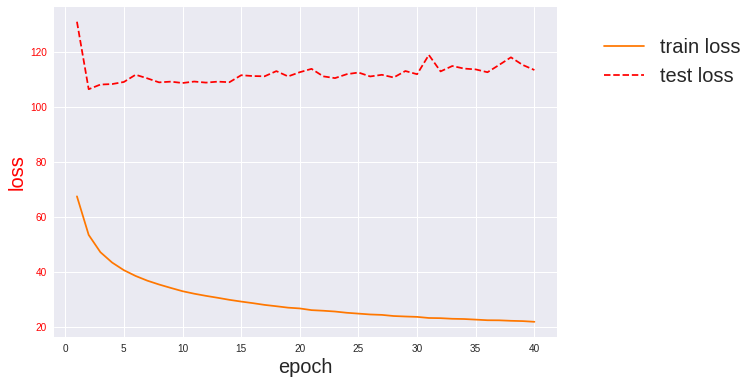

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(log_train[0], log_train[1], color='#ff7700')
ax1.plot(log_test[0], log_test[1], 'r--')
ax1.set_xlabel('epoch', size=20)
ax1.set_ylabel('loss', color='r', size=20)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
plt.legend(['train loss', 'test loss'], bbox_to_anchor=(1.4, 0.96), framealpha=0, fontsize=20)
plt.tight_layout()
plt.show()

In [8]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])

In [9]:
cat_speech_path = os.path.join(out_path, key)

In [10]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
pred_sents, utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=True)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

  0%|          | 0/3979 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
EPOCH = 41


/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer2/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.functions.pooling.MaxPoolingND is experimental. The interface can change in the future.
  FutureWarning)



CUDARuntimeError: cudaErrorMemoryAllocation: out of memory

In [ ]:
display_words(m_dict, v_dict, pred_sents[:n], utts[:n], dec_key)

In [ ]:
h, r = calc_bleu(m_dict, v_dict, pred_sents[:n], utts[:n], dec_key)

In [ ]:
corpus_bleu(r, h)